In [47]:
import pandas as pd          
import numpy as np       
import matplotlib.pyplot as plt 
import seaborn as sns            

from sklearn.datasets import load_breast_cancer          
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score    
from sklearn.preprocessing import StandardScaler      
from sklearn.svm import SVC                              
from sklearn.neighbors import KNeighborsClassifier    
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             classification_report,
                             roc_curve,
                             auc)                          


In [17]:
df = pd.read_csv("data/data.csv")
print(df.head())
print(df.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [25]:
# drop unnecessary column
df.drop(["Unnamed: 32", "id"], axis=1, inplace=True)

# convert to numerical
df["target"] = df["diagnosis"].map({"M": 1, "B": 0})
df.drop("diagnosis", axis=1, inplace=True)

In [27]:
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
target                     0
dtype: int64

In [31]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# SVM Model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9824561403508771
[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [37]:
# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9473684210526315
[[68  3]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



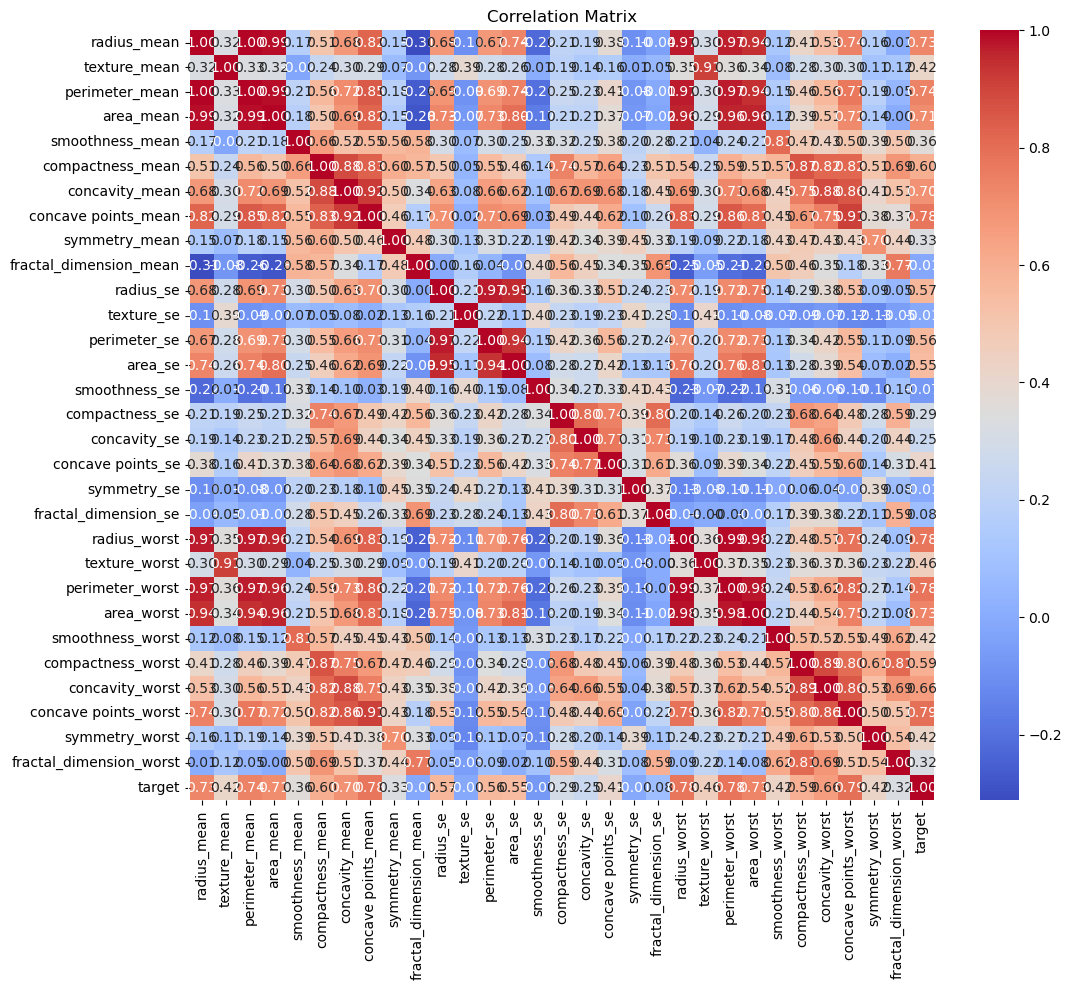

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [43]:
# Model tuning

param_grid_svm = {
    'C': [0.1, 1, 10],                   
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']            
}

svm = SVC()
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

print("SVM - Best Parameters:", grid_search_svm.best_params_)

# test with best model
best_svm = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

print("Tuned SVM Accuracy:", accuracy_score(y_test, y_pred_best_svm))
print(confusion_matrix(y_test, y_pred_best_svm))
print(classification_report(y_test, y_pred_best_svm))

SVM - Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Tuned SVM Accuracy: 0.9824561403508771
[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [45]:
param_grid_knn = {
    'n_neighbors': list(range(1, 21)),     # 1'den 20'ye kadar komşu sayısı
    'weights': ['uniform', 'distance'],   # Ağırlık tipi
    'metric': ['euclidean', 'manhattan']  # Mesafe metodu
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

print("KNN - Best Parameters:", grid_search_knn.best_params_)

# En iyi modelle test yap
best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

print("Tuned KNN Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print(confusion_matrix(y_test, y_pred_best_knn))
print(classification_report(y_test, y_pred_best_knn))


KNN - Best Parameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
Tuned KNN Accuracy: 0.956140350877193
[[69  2]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [49]:
## SVM Cross-Validation
svm_cv_scores = cross_val_score(best_svm, X_train, y_train, cv=10)
print("SVM CV Scores:", svm_cv_scores)
print("SVM CV Mean:", svm_cv_scores.mean())

# KNN CV
knn_cv_scores = cross_val_score(best_knn, X_train, y_train, cv=10)
print("KNN CV Scores:", knn_cv_scores)
print("KNN CV Mean:", knn_cv_scores.mean())

SVM CV Scores: [0.97826087 0.97826087 0.97826087 0.95652174 0.97826087 1.
 1.         0.97777778 0.97777778 0.88888889]
SVM CV Mean: 0.971400966183575
KNN CV Scores: [1.         0.97826087 0.95652174 0.93478261 1.         0.97777778
 0.97777778 0.97777778 0.97777778 0.88888889]
KNN CV Mean: 0.9669565217391305


  Model  Test Accuracy  CV Mean Accuracy
0   SVM       0.982456          0.971401
1   KNN       0.956140          0.966957


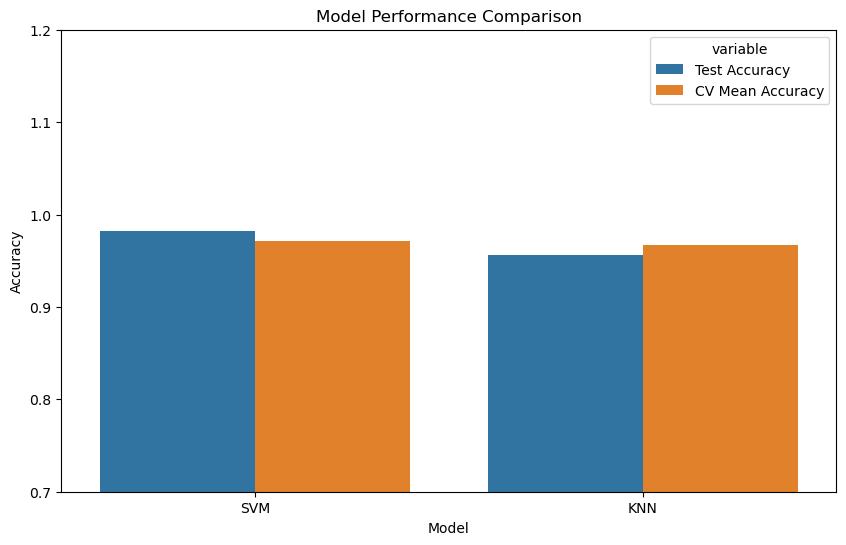

In [55]:
results = pd.DataFrame({
    'Model': ['SVM', 'KNN'],
    'Test Accuracy': [accuracy_score(y_test, y_pred_best_svm),
                      accuracy_score(y_test, y_pred_best_knn)],
    'CV Mean Accuracy': [svm_cv_scores.mean(), knn_cv_scores.mean()]
})

print(results)

plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='value', hue='variable',
            data=pd.melt(results, ['Model']))
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.2)  
plt.show()